#1.1

In [1]:
import numpy as np
import cmath
import math

In [2]:
def read_pgm(pgmf):
    rs = pgmf.readline()
    rd = pgmf.readline()
    if str(rd).find('#') != -1 :
        rd = pgmf.readline()
    (width, height) = [int(i) for i in rd.split()]

    raster = []
    for y in range(height):
        row = []
        for x in range(width):
            row.append(ord(pgmf.read(1)))
        raster.append(row)
    return raster

In [3]:
def writePGM(file, w, h, max_grayscale, flatImg):
    file.write('P5\n'.encode())
    file.write('{} {}\n'.format(w, h).encode())
    file.write('{}\n'.format(max_grayscale).encode())
    file.write(bytearray(flatImg))
    file.close()

In [4]:
def padding_center(img, pad):
    pading = [255]*(pad//2)
    l = len(img[0])
    for row in img :
        for zero in pading :
            row.insert(0, zero)
        row.extend(pading)
    pading = [[255]*(l + 2 * (pad//2)) for _ in range(pad//2)]
    for row in pading:
        img.insert(0, row)
    img.extend(pading)

In [5]:
def normal(img):
    copy_img = np.array(img.copy())
    log = (255/np.log(255))
    w,h = copy_img.shape
    normal_pic = [[int(log * np.log(1+(255/np.max(copy_img)*img[a][b]))) for a in range(w) ] for b in range(h)]
    return w, h, normal_pic

In [7]:
def convert(img):
    ampli = []
    pha = []
    for inn in img:
        row_a = []
        row_p = []
        for j in inn:
            a = np.abs(j)
            b = np.angle(j)
            row_a.append(a)
            row_p.append(b)
        ampli.append(row_a)
        pha.append(row_p)
    return ampli,pha

In [8]:
def contrast_s(li):
    result = []
    c = np.amin(li)
    d = np.amax(li)
    a = 0
    b = 255
    for i in range(len(li)):
        row = []
        for j in range(len(li[0])):
            p = li[i][j]
            p_out = (p - c)*((b - a)/(d - c)) + a
            row.append(int(p_out))
        result.append(row)
    return result

In [9]:
def flatten(arr):
    return sum(arr, [])

In [10]:
a = open(".\Picture\Cross.pgm",'rb')
img = read_pgm(a)
a.close()

padding

In [11]:
padding_center(img,56)
img[28][28] = 255
img[28][29] = 255
img[28][30] = 255
img[28][31] = 255
x,y = len(img),len(img[0])
print(x,y)

256 256


In [12]:
invert = [[255 if i == 0 else 0 for i in row ] for row in img ]

FFT

In [17]:
raw_img = np.fft.fftshift(np.fft.fft2(invert))

patr convert

In [28]:
amplitude, phase  = convert(raw_img)

In [185]:
phase_out = contrast_s(phase)

In [32]:
w , h , picture = normal(amplitude)

part save image

In [64]:
save_dir = open("./Picture/result_amp.pgm","wb")
writePGM(save_dir , w , h , 255 , flatten(picture))

In [19]:
save_dir = open("./Picture/result_phase.pgm","wb")
writePGM(save_dir , len(phase_out[0]) , len(phase_out) , 255 , flatten(phase_out))

In [44]:
save_dir = open("./Picture/test_plus.pgm","wb")
writePGM(save_dir , len(img[0]) , len(img) , 255 , flatten(img))

#1.2

In [51]:
def shift(input_img , x ,y):
    return [[input_img[i][j] * np.exp(-2j*np.pi*((x*j/w)+(y*i/h))) for j in range(len(input_img[0])) ] for i in range(len(input_img)) ]

In [52]:
r_img = np.fft.fftshift(np.fft.fft2(img))

In [53]:
re = shift(r_img,20,30)

In [58]:
new_img = np.fft.ifft2(np.fft.ifftshift(re))
re_new = np.abs(new_img)

In [63]:
save_dir = open("./Picture/result_move.pgm","wb")
writePGM(save_dir , len(re_new[0]) , len(re_new) , 255 , flatten(re_new))

#1.3

In [51]:
def rotate(img,theta):
    radian = math.radians(theta)
    bg_img = [[255]*(len(img)) for _ in range(len(img)) ]
    matrix_totate = np.array([[math.cos(radian),-1*math.sin(radian)],[math.sin(radian),math.cos(radian)]])
    l = len(img)
    for i ,row in enumerate(img):
        for j , _ in enumerate(row) :
            check = np.array([i-(l/2) , j-(l/2)])
            a , b =(check * matrix_totate).sum(axis=1) + (l/2)
            if 0 <= a <= 255 and 0 <= b <= 255 :
                bg_img[i][j] = img[int(a)][int(b)]
    return bg_img

In [52]:
rotated_img = rotate(img,30)

In [54]:
r13_img = np.fft.fftshift(np.fft.fft2(rotated_img))

In [55]:
amplitude13, phase13  = convert(r13_img)

In [58]:
x,y , amp_norm = normal(amplitude13)

In [77]:
phase_out13 = contrast_s(phase13)

part save

In [83]:
save_dir = open("./Picture/result_rotate.pgm","wb")
writePGM(save_dir , len(rotated_img[0]) , len(rotated_img) , 255 , flatten(rotated_img))

In [80]:
save_dir = open("./Picture/phase_rotate.pgm","wb")
writePGM(save_dir , len(phase_out13[0]) , len(phase_out13) , 255 , flatten(phase_out13))

In [82]:
save_dir = open("./Picture/amp_rotate.pgm","wb")
writePGM(save_dir , len(amp_norm[0]) , len(amp_norm) , 255 , flatten(amp_norm))

#1.4

In [69]:
def down_sample(img,ratio):
    new_size = np.round(len(img)*ratio,0).astype(int)
    new_list = [[255]*new_size for _ in range(new_size)]
    for i in range(new_size):
        for j in range(new_size):
            new_list[i][j] = img[int(i * (1/ratio))][int(j * (1/ratio))]
    return new_list , new_size

In [72]:
a_input = open(".\Picture\Cross.pgm",'rb')
img_ori = read_pgm(a_input)
a_input.close()

In [99]:
resize_img , n= down_sample(img_ori,0.5)
resize_img[0][0] = 255
resize_img[0][1] = 255

In [102]:
fft_re_img = np.fft.fftshift(np.fft.fft2(resize_img))

In [103]:
amplitude14, phase14  = convert(fft_re_img)

In [104]:
_ , _ , amp_norm14 = normal(amplitude14)

In [105]:
phase_out14 = contrast_s(phase14)

Part save

In [107]:
save_dir = open("./Picture/result_resize.pgm","wb")
writePGM(save_dir , len(resize_img[0]) , len(resize_img) , 255 , flatten(resize_img))

In [108]:
save_dir = open("./Picture/phase_resize.pgm","wb")
writePGM(save_dir , len(phase_out14[0]) , len(phase_out14) , 255 , flatten(phase_out14))

In [109]:
save_dir = open("./Picture/amp_resize.pgm","wb")
writePGM(save_dir , len(amp_norm14[0]) , len(amp_norm14) , 255 , flatten(amp_norm14))

1.5

1.5.1 non Phase

In [110]:
new_img_nphase = np.fft.ifft2(np.fft.ifftshift(amplitude))
re_new_nphase = np.abs(new_img_nphase)

In [112]:
_ , _ , re_new_nphase_norm = normal(re_new_nphase)

In [129]:
re_new_nphase_const = contrast_s(re_new_nphase)

Part save

In [131]:
save_dir = open("./Picture/result_invert_non_phase.pgm","wb")
writePGM(save_dir , len(re_new_nphase_const[0]) , len(re_new_nphase_const) , 255 , flatten(re_new_nphase_const))

1.5.2 non Amplitude

In [132]:
new_img_namp = np.fft.ifft2(np.fft.ifftshift(phase))
re_new_namp = np.abs(new_img_namp)

In [133]:
re_new_namp_const = contrast_s(re_new_namp)

Part save

In [135]:
save_dir = open("./Picture/result_invert_non_amplitude.pgm","wb")
writePGM(save_dir , len(re_new_namp_const[0]) , len(re_new_namp_const) , 255 , flatten(re_new_namp_const))

1.6

In [177]:
len_input = open(".\Picture\Lenna.pgm",'rb')
lenna_img_ori = read_pgm(len_input)
len_input.close()

In [178]:
fft_img_lenna = np.fft.fftshift(np.fft.fft2(lenna_img_ori))
amplitude_lenna , phase_lenna = convert(fft_img_lenna)

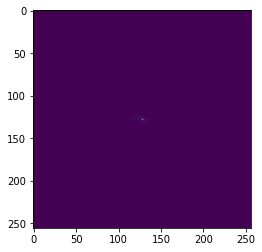

In [179]:
import matplotlib.pyplot as plt

plt.imshow(amplitude_lenna)

1.6.1 non Phase

In [180]:
lenna_img_nphase = np.fft.ifft2(np.fft.ifftshift(amplitude_lenna))
lenna_new_nphase = np.abs(lenna_img_nphase)

In [181]:
_ , _ , lenna_new_nphase_norm = normal(lenna_new_nphase)

Part save

In [185]:
save_dir = open("./Picture/result_invert_non_phase_lenna.pgm","wb")
writePGM(save_dir , len(lenna_new_nphase_norm[0]) , len(lenna_new_nphase_norm) , 255 , flatten(lenna_new_nphase_norm))

1.6.2 non Amplitude

In [161]:
lenna_img_namp = np.fft.ifft2(np.fft.ifftshift(phase_lenna))
lenna_new_namp = np.abs(lenna_img_namp)

In [162]:
_ , _ , lenna_new_namp_norm = normal(lenna_new_namp)

In [164]:
lenna_new_namp_const = contrast_s(lenna_new_namp)

Part save

In [165]:
save_dir = open("./Picture/result_invert_non_amplitude_lenna.pgm","wb")
writePGM(save_dir , len(lenna_new_namp_const[0]) , len(lenna_new_namp_const) , 255 , flatten(lenna_new_namp_const))

1.7

In [110]:
chess_input = open(".\Picture\Chess.pgm",'rb')
chess_img_ori = read_pgm(chess_input)
chess_input.close()

In [99]:
box_blur = [[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]]

In [67]:
padding_center(chess_img_ori,2)

In [91]:
padding_center(box_blur,255)

In [97]:
new_box_blur = np.array(box_blur)

In [131]:
new_box_blur_edited = np.delete(new_box_blur,0,1)
new_box_blur_edited_2 = np.delete(new_box_blur_edited,0,0)

In [51]:
def convolution(img,kernel):
    n = len(img)
    result_img = [[255]*n for _ in img]
    for i in range(1,n-1):
        for j in range(1,n-1):
            temp = 0
            temp += img[i][j] * kernel[1][1]
            temp += img[i-1][j-1] * kernel[0][0]
            temp += img[i-1][j] * kernel[0][1]
            temp += img[i+1][j+1] * kernel[2][2]
            temp += img[i][j-1] * kernel[1][0]
            temp += img[i][j+1] * kernel[1][2]
            temp += img[i+1][j-1] * kernel[2][0]
            temp += img[i+1][j] * kernel[2][1]
            temp += img[i+1][j+1] * kernel[2][2]
            result_img[i][j] = int(temp)
    return result_img


In [147]:
def convolution_freq(img,kernel):
    length = len(img)
    return_img = [[255]*length for _ in img]
    for i in range(length):
        for j in range(length):
            return_img[i][j] = fft_of_img[i][j] * kernel[i][j]
    return return_img

In [69]:
chess_box_blur = convolution(chess_img_ori,box_blur)

In [148]:
fft_of_img = np.fft.fftshift(np.fft.fft2(chess_img_ori))
fft_of_kernel = np.fft.fftshift(np.fft.fft2(new_box_blur_edited_2))
chess_blur_freq_fft = convolution_freq(fft_of_img,fft_of_kernel)
new_return_img = np.fft.ifft2(np.fft.ifftshift(chess_blur_freq_fft))
chess_blur_freq = np.abs(new_return_img)

In [162]:
chess_blur_freq_contrst = contrast_s(chess_blur_freq)

Part save

In [54]:
save_dir = open("./Picture/Chess_convolution_box_blur.pgm","wb")
writePGM(save_dir , len(chess_box_blur[0]) , len(chess_box_blur) , 255 , flatten(chess_box_blur))

In [158]:
save_dir = open("./Picture/Chess_convolution_box_blur_freq.pgm","wb")
writePGM(save_dir , len(chess_blur_freq_contrst[0]) , len(chess_blur_freq_contrst) , 255 , flatten(chess_blur_freq_contrst))